# Лабораторная работа №1

Вариант №6, работу выполнила студентка группы 9383, Карпекина Анна.

### Список задач:

1. Выполнить загрузку аудио сигнала и построить огибающую (график).
2. Фильтрация (выбрать один из 4-х основных типо фильтров). Получить фильтрованный сигнал.
3. Детектор сигнал/шум. Получить сигнал после детектирования.
4. Эффект "Эхо". Получить сигнал после работы аудио-эффекта.
5. Эффект ”Distortion”(классический вариант). Получить сигнал после работы аудио-эффекта.

## Задача №1


Имеется сигнал $x(i), i \in [0,N-1].$ Хотим построить огибающую $y(j), j \in [0, n-1].$ Пусть $m = [\frac{N}{n}] -$ число точек в интервале усреднения. Тогда $y(i) = \frac{1}{m}\displaystyle\sum_{k=mj}^{mj + m -1} |x(k)|$


In [298]:
from os.path import dirname, join as pjoin
from scipy.io import wavfile
import scipy.io
import matplotlib.pyplot as plt

import numpy as np


In [299]:
data_dir = pjoin(dirname(scipy.io.__file__), './') #считываем аудиофайл
wav_fname = pjoin(data_dir, '03-01-05-01-02-01-06_A6.wav')
samplerate, data = wavfile.read(wav_fname)

<ipython-input-299-95e90d2c3d00>:3: WavFileWarning: Chunk (non-data) not understood, skipping it.
  samplerate, data = wavfile.read(wav_fname)


In [300]:
n = 1000  
N = len(data)
time = np.linspace(0, N, data.shape[0])
m = int(data.shape[0] / n)
Envelope_y = []
Envelope_x = np.linspace(0, N, n)

In [301]:
for j in range(n):                     #считаем y(i)
    summa = 0
    for k in range(m*j, (m*j) + m):
        summa += np.abs(data[k])
    Envelope_y.append(summa/m)

<ipython-input-302-6286028aa1bf>:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


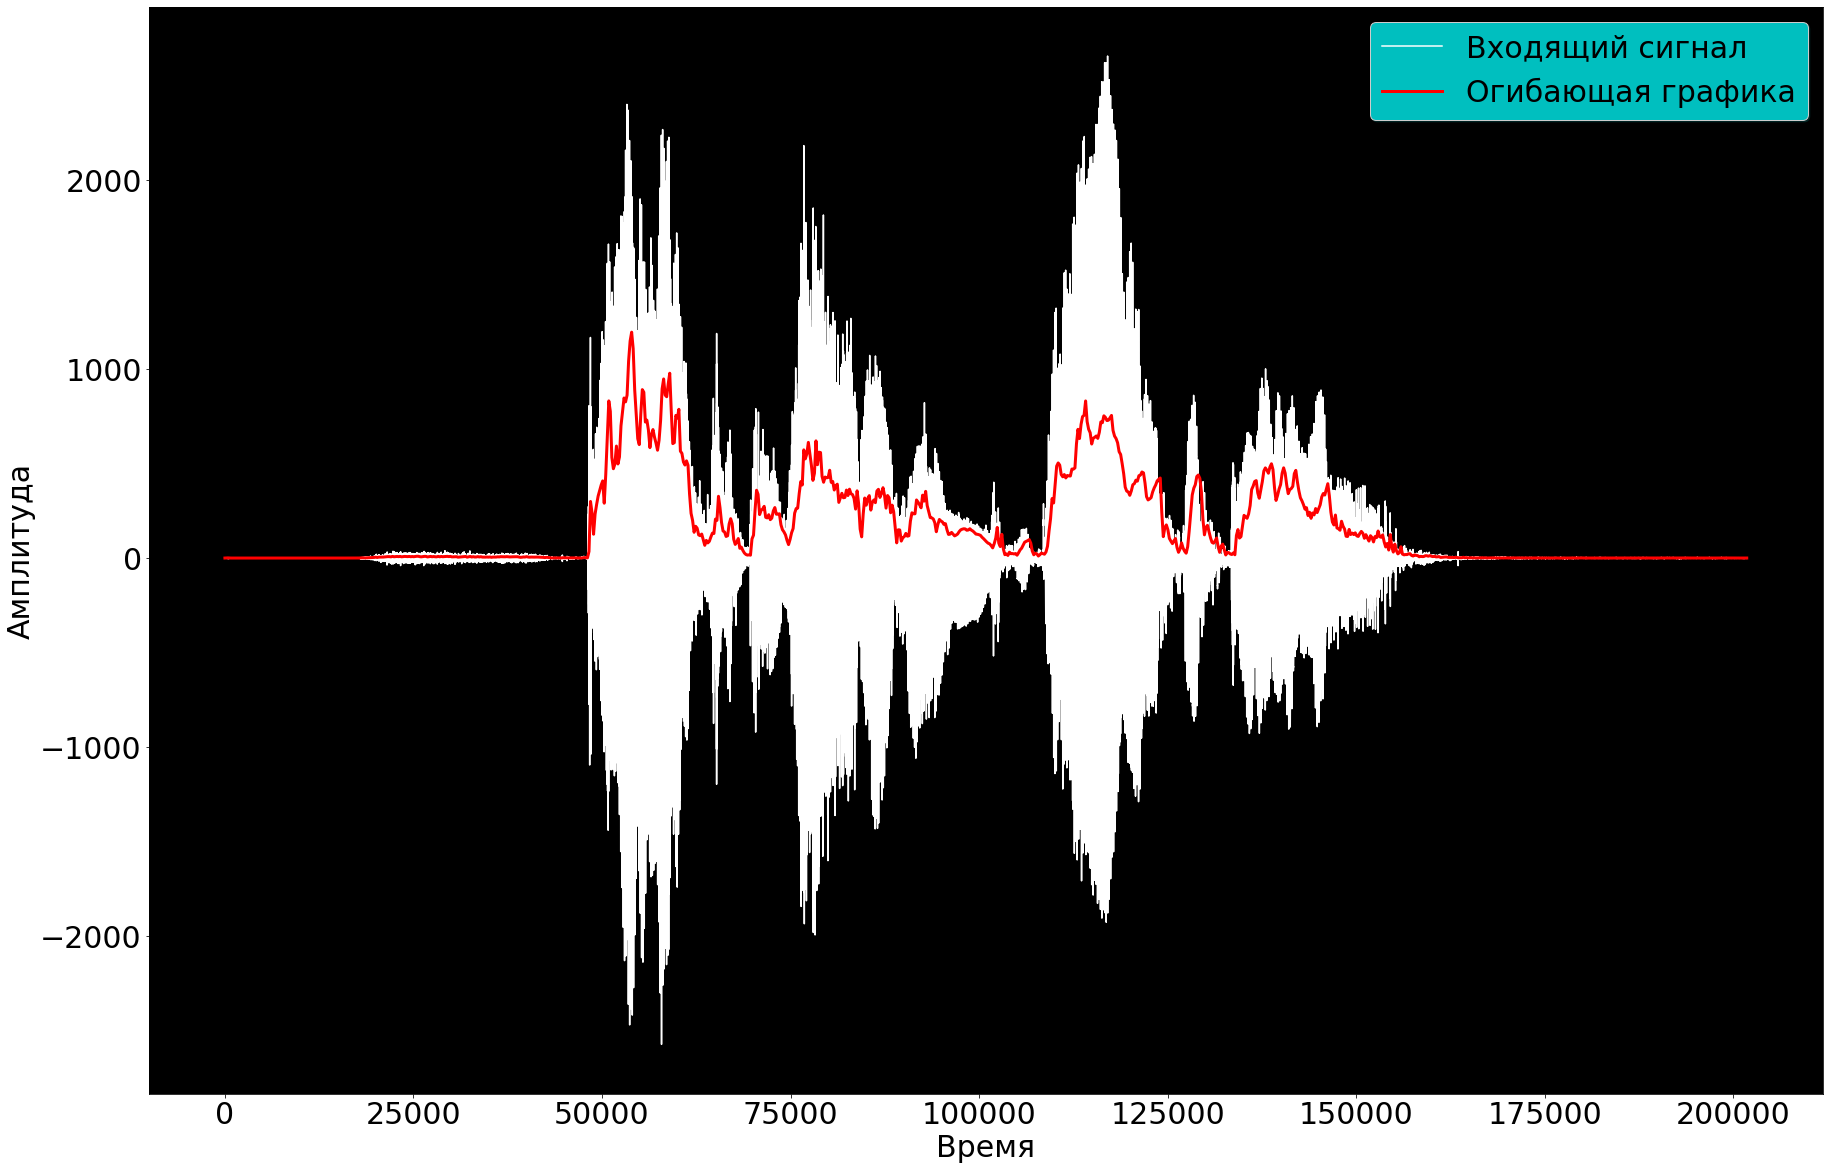

In [302]:
plt.rcParams['font.size'] = '30'       #строим график
fig = plt.figure('Огибающая графика') 
fig.set_figwidth(30)
fig.set_figheight(20)
plt.plot(time, data, color='w', label = 'Входящий сигнал')
plt.plot(Envelope_x, Envelope_y, color='r', linewidth = 3, label = 'Огибающая графика')
plt.xlabel('Время')
plt.ylabel('Амплитуда')
plt.legend(shadow =  True, facecolor = 'c')
ax = plt.axes()
ax.set(facecolor = 'black')
plt.show()

## Задача №2

Возьмём фильтр верхних частот. $F_d - $ частота дискретизации, $F_s - $ частота среза, $m - $ порядок фильтра. Требуется выслить $wn = 2\frac{F_s}{F_d}$

In [303]:
from scipy import signal

Fs = 800
m = 1
wn = 2 * Fs / samplerate
a, b = signal.butter(m, wn, 'highpass')   # применяем фильтр верхних частот

DataFilter = signal.filtfilt(a, b, data)  # получаем отфильтрованные данные

<ipython-input-304-7f8a0ed0a600>:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


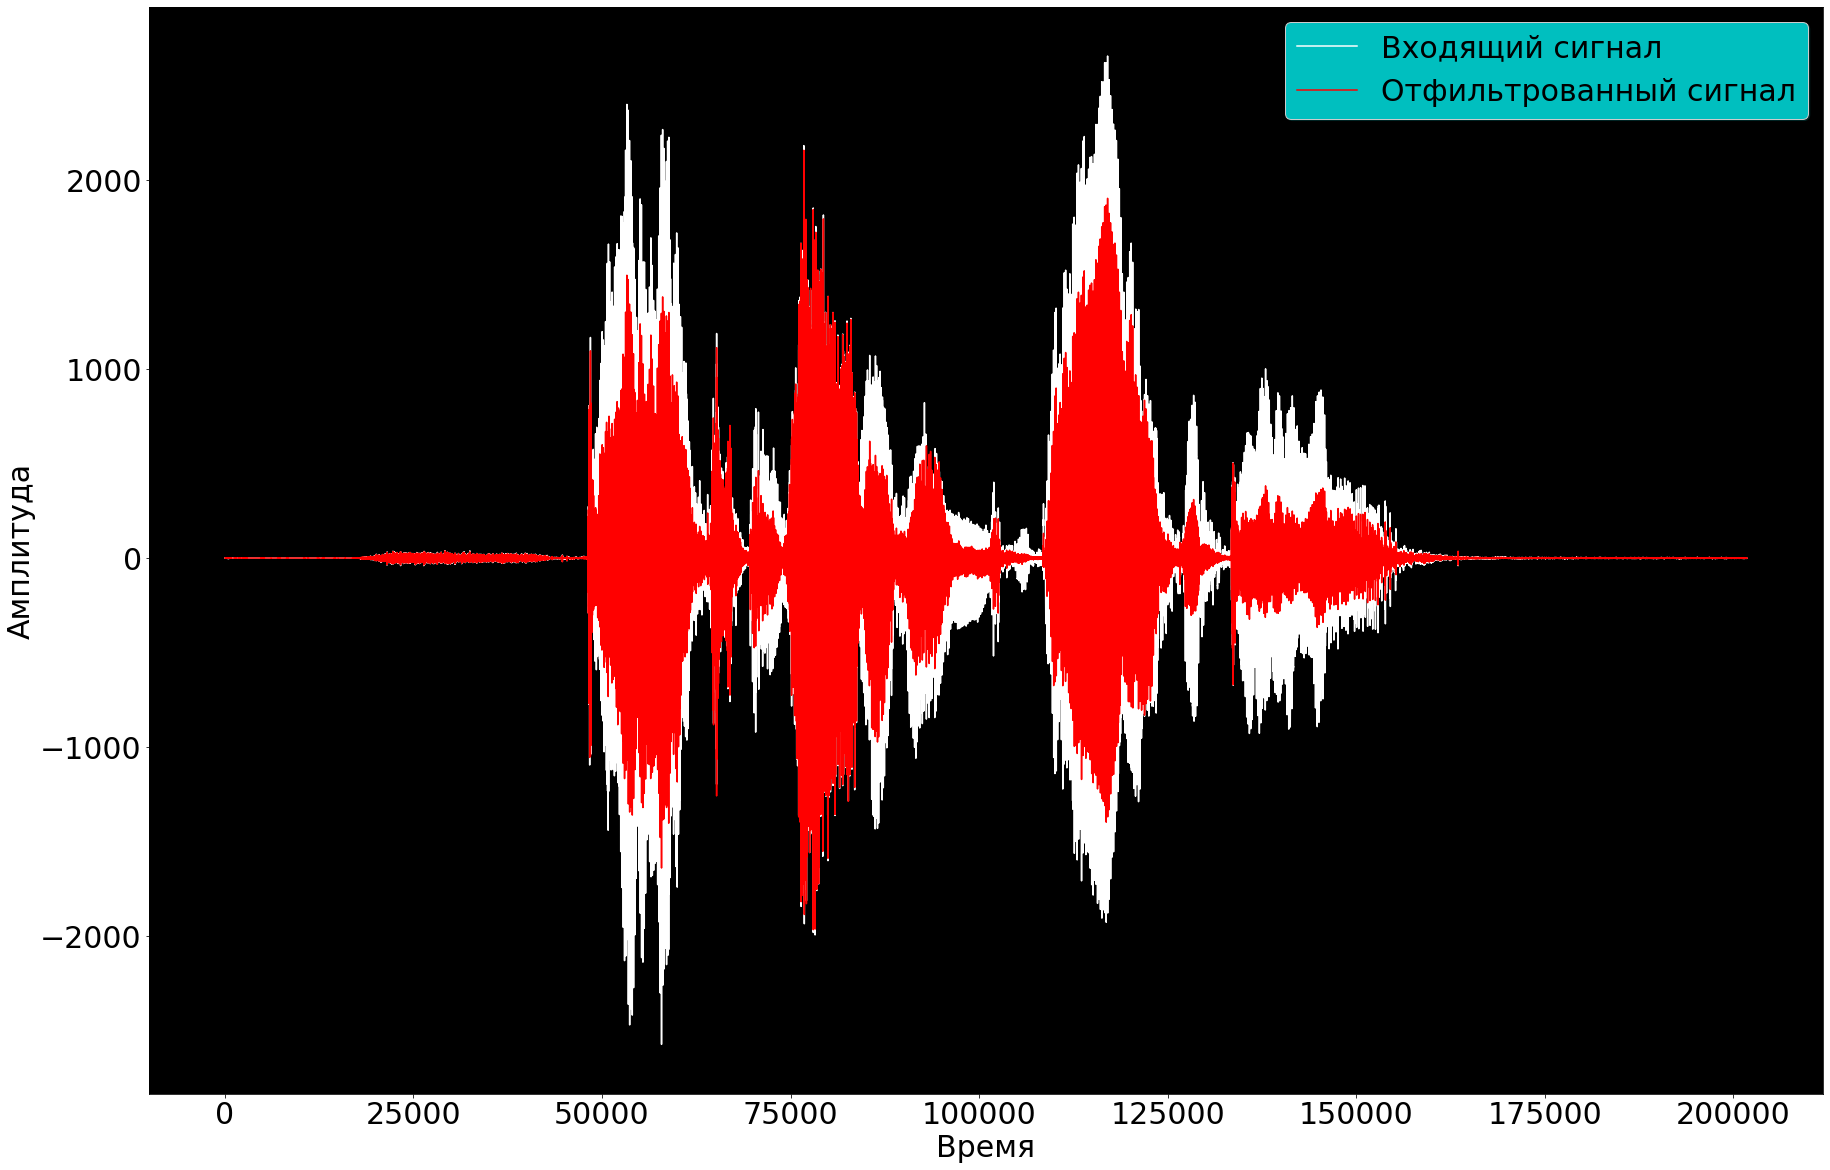

In [304]:
fig = plt.figure()                        # строим график
fig.set_figwidth(30)
fig.set_figheight(20)
plt.plot(time, data, color='w', label = 'Входящий сигнал')
plt.plot(time, DataFilter, color="r", label = 'Отфильтрованный сигнал')
plt.xlabel('Время')
plt.ylabel('Амплитуда')
plt.legend(shadow =  True, facecolor = 'c')
ax = plt.axes()
ax.set(facecolor = 'black')
plt.show()

## Задача №3

Определяем среднее сигнала по амплитуде (без учета знака):  
$mid = \frac{1}{N}\sum_{k=0}^{N-1}|x(k)|$  
Определяем порог детектора - $Th = \alpha*  mid$, где 0 < $\alpha$ < 1 подбирается экспериментально. Задаем величину "провала"(в отсчетах) - $k$. Обозначим $y(i)$ - сигнал после детектирования. 
* Событие "начало сигнала". Если $x(i)$ в течение $k$ отсчетов превышает порог, $y(i) = x(i)$.  
* Событие "окончание сигнала". Если $x(i)$ в течение $k$ отсчетов меньше порога, $y(i) = 0$.

In [305]:
mid = 0          # определяем среднее сигнала по амплитуде
for i in range(N):
    mid += abs(data[i])
mid = mid / N
alpha = 0.7
Th = alpha * mid # определяем порог детектора

k = 20
signal_after_detection = []
flag = False
count_ok = 0
count_not_ok = 0

for index in range(N):
    if abs(data[index]) > Th:
        count_ok = count_ok + 1
        count_not_ok = 0
        if count_ok >= k:
            flag = True
            signal_after_detection.append(data[index])
        else:
            signal_after_detection.append(0)
    else:
        count_not_ok = count_not_ok + 1
        count_ok = 0
        signal_after_detection.append(0)
    if count_not_ok >= k:
        flag = False

<ipython-input-306-144ef184f4e9>:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


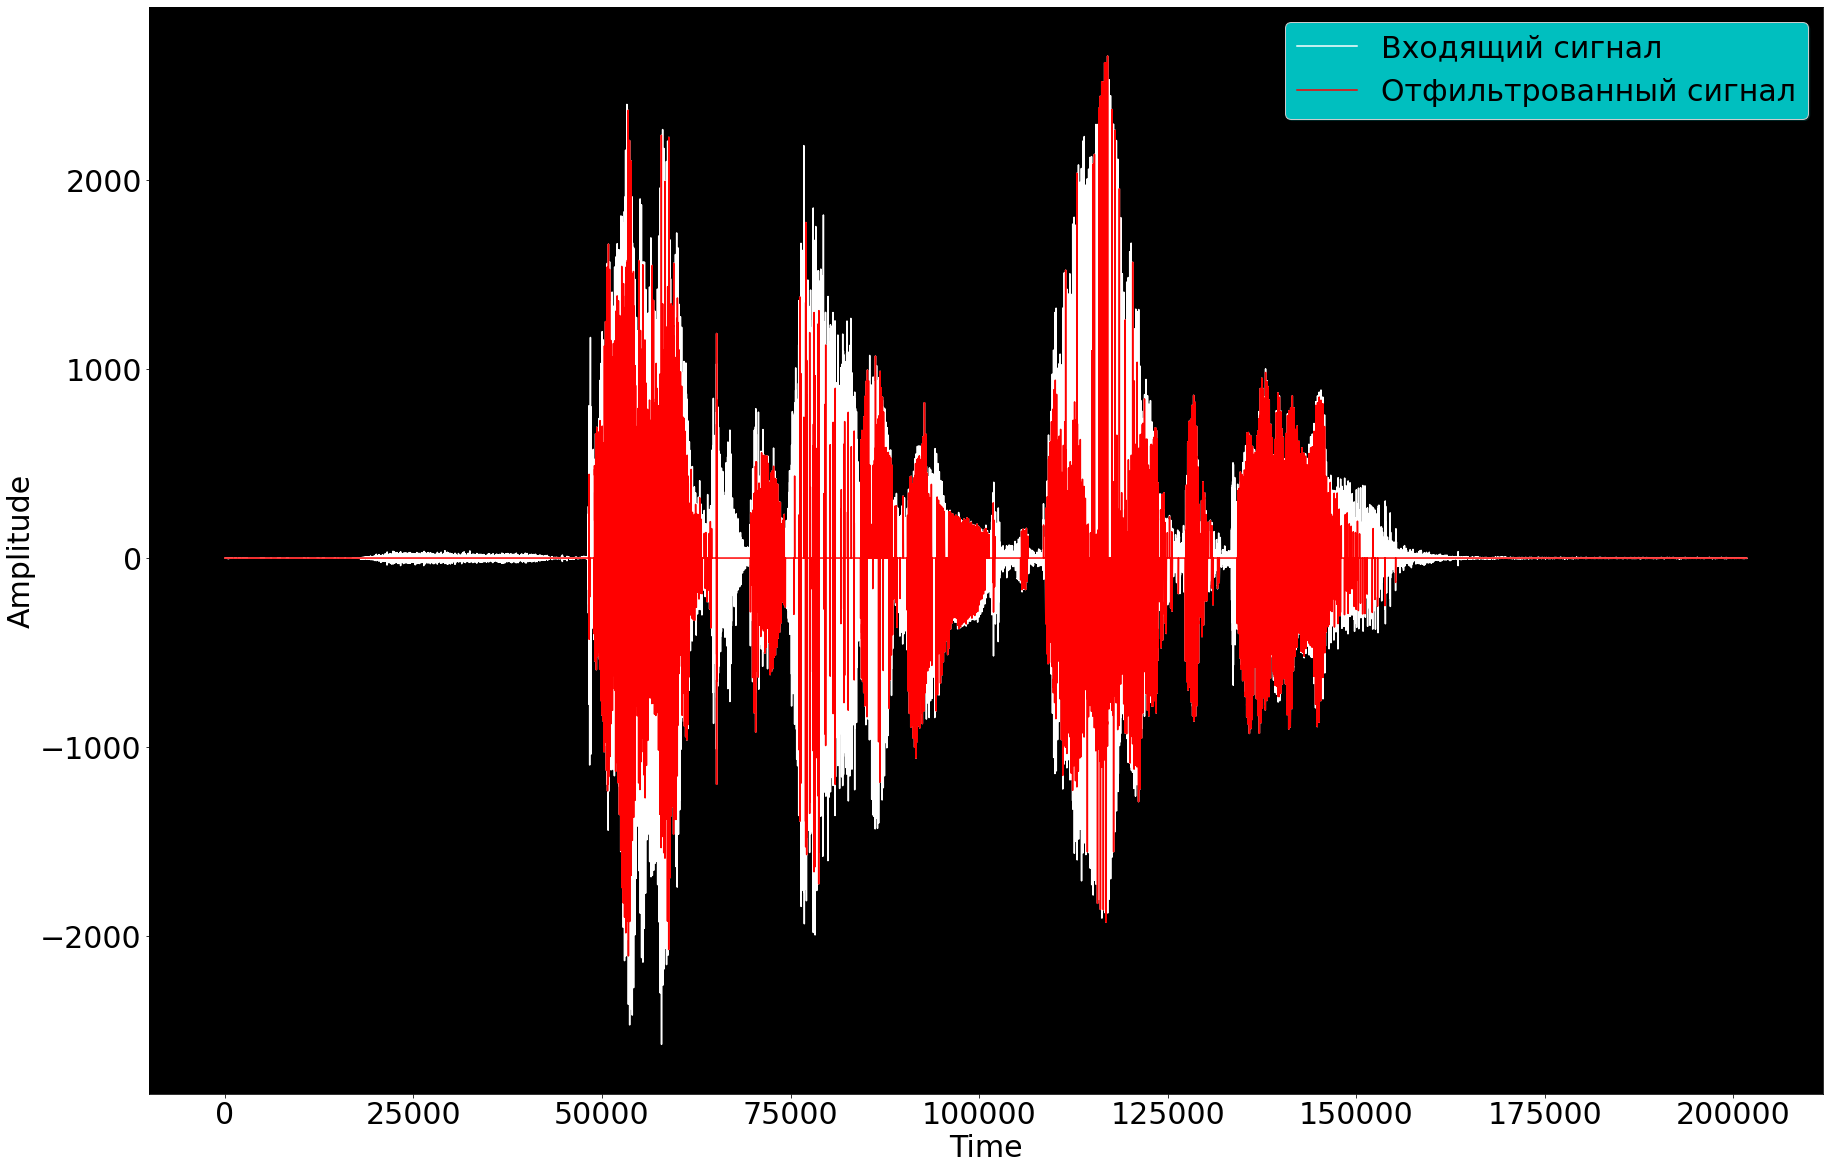

In [306]:
fig = plt.figure('Детектор шума')
fig.set_figwidth(30)
fig.set_figheight(20)
plt.plot(data, color='w', label = 'Входящий сигнал')
plt.plot(signal_after_detection, color="r", label = 'Отфильтрованный сигнал')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend(shadow =  True, facecolor = 'c')
ax = plt.axes()
ax.set(facecolor = 'black')
plt.show()

## Задача №4

Каждая линия задержки имеет свой весовой коэффициент (задается пользователем):
${α_1;α_2; . . . ;α_{N_L}}$.  
* Перед добавлением к исходному сигналу, выход ревербератора фильтруется ФНЧ-фильтром первого порядка.  
* Желаемое соотношение между "сухим" и обработанным сигналом задается коэффициентом применимости ${\gamma}$.  
* Ревербератор может работать в двух режимах: ручной и с использованием готовой конфигурации (preset):    

Для ручного режима регулируется пользователем задается максимальная задержка ${D1}$, а величины остальных определяются автоматически через нее: ${D_i = D_1 * 2^{\frac{1 - i}{N_L}} , i = 2, . . . ,N_L}$.  

Для готовой конфигурации пользователь вручную задает последовательность ${D_1;D_2; . . . ;D_NL}$
В данной программе пользователь сначала выбирает режим: 1 - с использованием готовой конфигурации, 2 - ручной. Если пользователь ввел некорректный режим, то программа выдает повторный запрос на ввод режима и сообщение о неправильном выборе режима. Затем пользователь подает данные в соответствии с выбранным режимом.

In [307]:
result = data
delay = []
flag = True

In [308]:
while(flag == True):                                     # ввод данных
    print('Выберете режим')
    print('С использованием готовой конфигурации - 1')
    print('Ручной режим - 2\n')
    a = int(input())
    if (a == 1):
        for i in range(9):
            delay.append(int(input()))
        delay.sort()
        delay.reverse()
        flag = False
    elif (a == 2):
        max_delay = int(input('Введите максимальную задержку: '))
        delay.append(max_delay)
        flag = False
        for i in range(2, 10):
            next_delay = max_delay * 2 ** ((1 - i) / 9)
            delay.append(next_delay)
    else:
        print('Введенный режим не верен, введите 1 или 2')

Выберете режим
С использованием готовой конфигурации - 1
Ручной режим - 2

2
Введите максимальную задержку: 500


In [309]:
echo = np.zeros(N * 9)
for i in range(len(delay)):
    xi = data * (delay[i] / samplerate)
    echo[i * N : (i + 1) * N] = xi[:]

Fs = 800                                  # выбираем значения частоты среза и порядок фильтра
m = 1
wn = 2 * Fs / samplerate
gamma = 0.4

a, b = signal.butter(m, wn, 'lowpass')    # применяем фильтр нижних частот
echo_data_filter = signal.filtfilt(a, b, echo)
echo = echo_data_filter * gamma
result = [*result, *echo]

<ipython-input-310-0a5d142fe57f>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


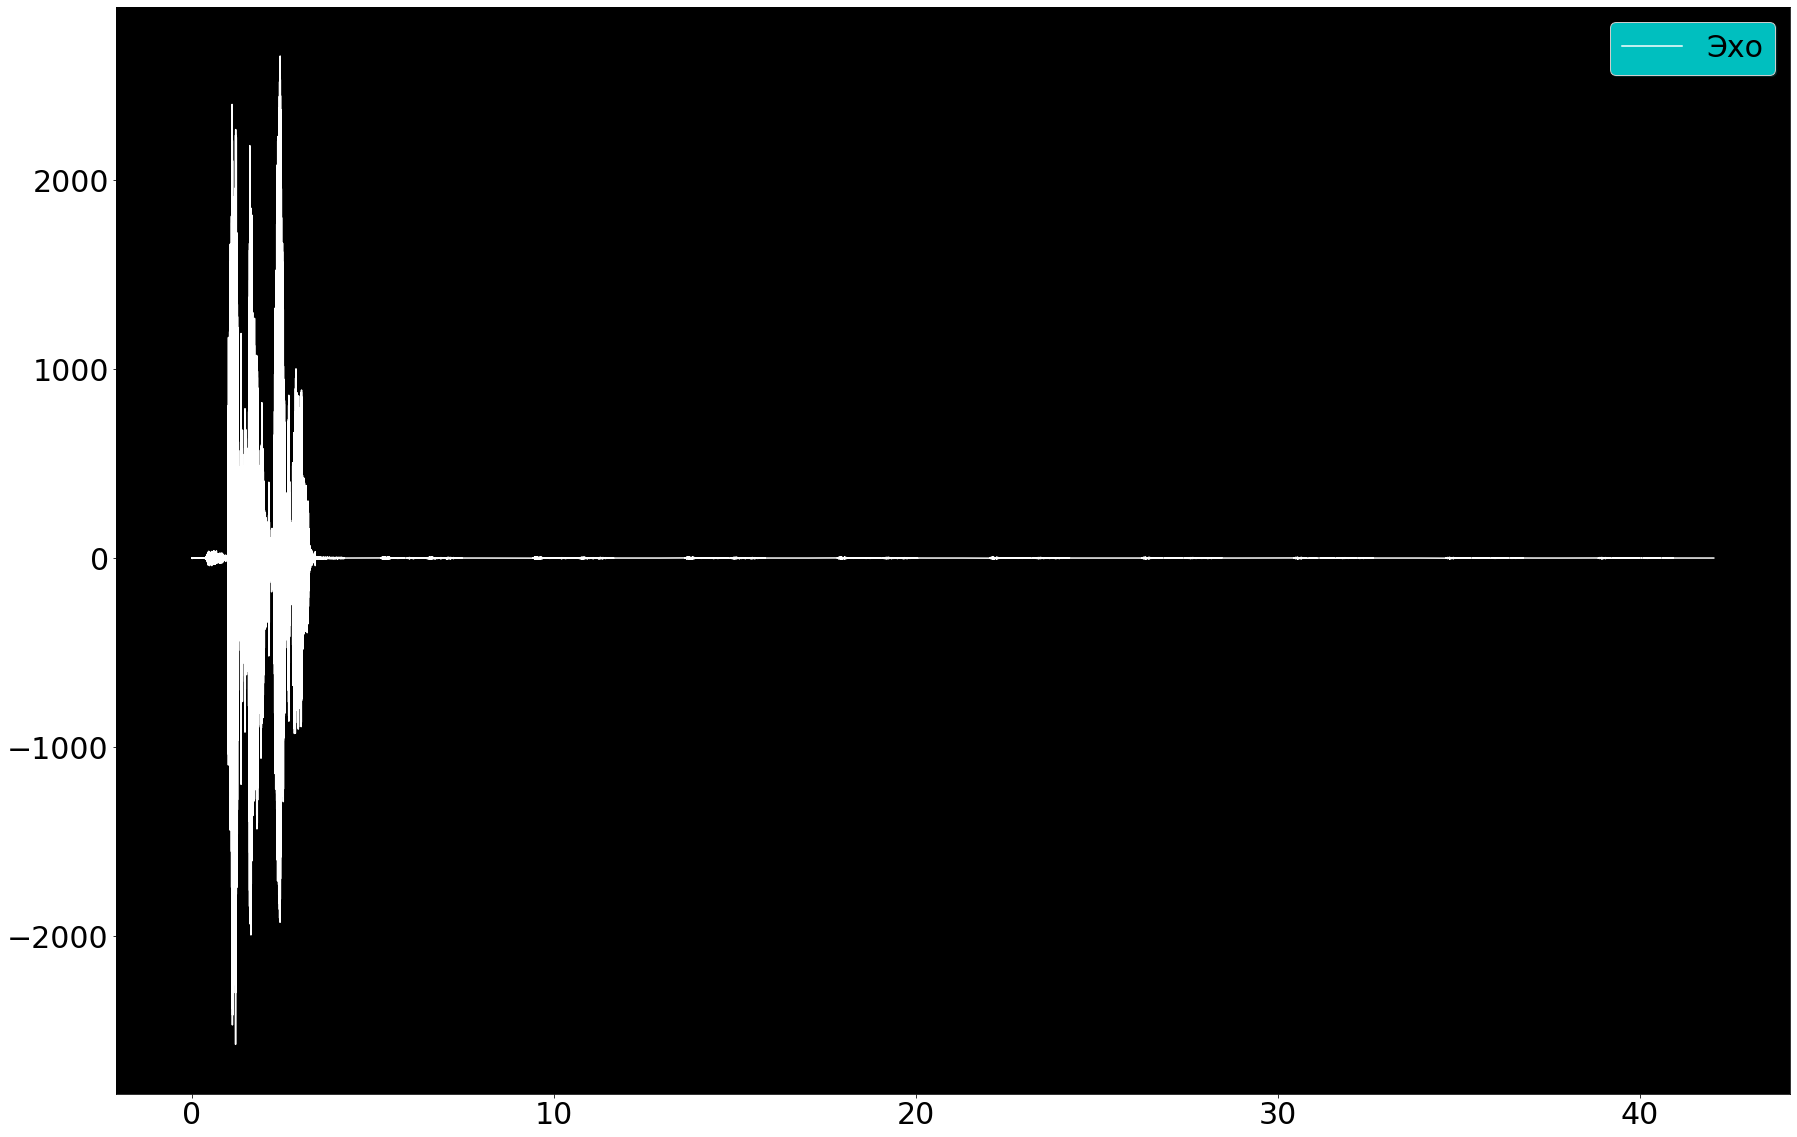

In [310]:
fig = plt.figure()
plt.plot(np.linspace(0, (N/samplerate) * 10, N * 10), result, label='Эхо', color="w")
fig.set_figwidth(30)
fig.set_figheight(20)
plt.legend(shadow =  True, facecolor = 'c')
ax = plt.axes()
ax.set(facecolor = 'black')
plt.show()

## Задача №5

Обозначим входной и выходной сигналы, соотвественно как $x(i)$ и $y(i), i \in [0,N-1] \newline$ Пользователь задаёт порог $Th$ и максимальное значение сигнала $max > Th$. Тогда: $\newline$ $Y(i) =
  \begin{cases}
    x(i)                  \quad |x(i)|< Th \\
    max \cdot sign(x(i))  \quad   |x(i)|> Th
  \end{cases}$

In [314]:
Th = float(input("Введите порог: "))
maximum = float(input("Введите максимальное значение сигнала: "))
distortion = np.zeros(N)

for i in range(0, N):
    if abs(data[i]) <= Th:
        distortion[i] = data[i]
    else:
        distortion[i] = maximum * np.sign(data[i])

Введите порог: 100
Введите максимальное значение сигнала: 1000


<ipython-input-315-6216be57727d>:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


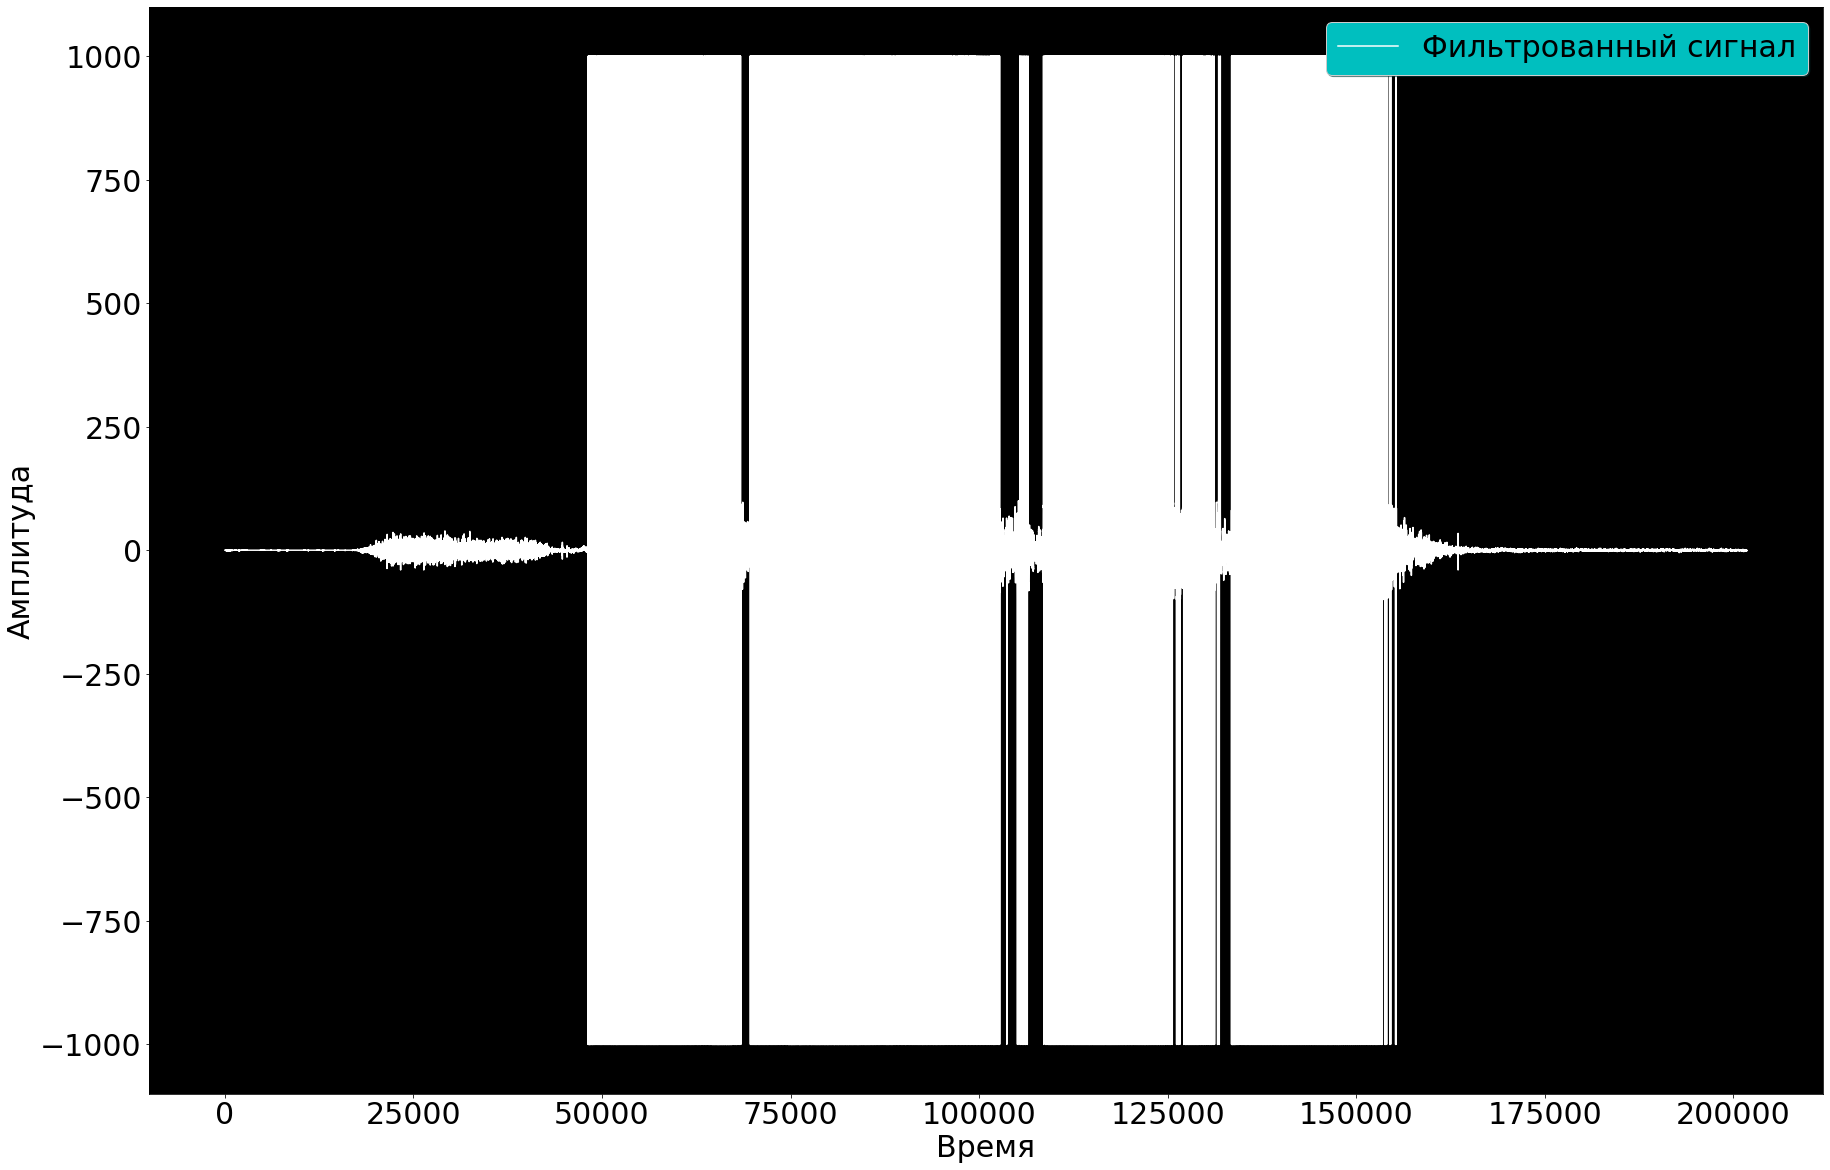

In [315]:
fig = plt.figure('Distortion')
fig.set_figwidth(30)
fig.set_figheight(20)
plt.plot(time,distortion, color='w', label = 'Фильтрованный сигнал')
plt.xlabel('Время')
plt.ylabel('Амплитуда')
plt.legend(shadow =  True, facecolor = 'c')
ax = plt.axes()
ax.set(facecolor = 'black')
plt.show()

## Вывод

В процессе выполнения лабораторной работы была изучена библиотека scipy, которая используется для обработки звука.

### Источники

https://devpractice.ru/matplotlib-lessons/    
https://docs.scipy.org/doc/  
http://ilfire.ru/kompyutery/shpargalka-po-sintaksisu-markdown-markdaun-so-vsemi-samymi-populyarnymi-tegami/#link6  